### Practical 2: Word Embedding
#### Ayoub Bagheri
<img src="img/uu_logo.png" alt="logo" align="right" title="UU" width="50" height="20" />

In this practical we are going to apply different word embedding methods. For this purpose, we use the following packages:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np    
from sklearn.decomposition import PCA
from numpy import linalg as LA

# First install the gensim library

In this practical session we're going to use the [gensim](https://radimrehurek.com/gensim/) library. This library offers a variety of methods to read
in pre-trained word embeddings as well as train your own.

The website contains a lot of documentation, for example here: https://radimrehurek.com/gensim/auto_examples/index.html#documentation

If gensim isn't installed yet, you can use the following command:


In [2]:
# !pip install gensim

In [2]:
from gensim.test.utils import datapath

# Reading in a pre-trained model

1\. **Use the code below to load in a pre-trained GloVe model. Note: this can take around five minutes.**

See https://github.com/RaRe-Technologies/gensim-data for an overview of the models you can try. For example

*   word2vec-google-news-300: word2vec trained on Google news. 1662 MB.
*   glove-twitter-200: trained on Twitter: 758 MB 

We're going to start with `glove-wiki-gigaword-300` which
is 376.1MB to download. These embeddings are trained on 
Wikipedia (2014) and the Gigaword corpus, a large collection
of newswire text.

In [3]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

# Exploring the vocabulary

2\. **How many words does the vocabulary contain?**

In [5]:
wordvecs = list(wv.index_to_key)
len(wordvecs)

400000

3\. **Is '*utrecht*' in the vocabulary?**

In [6]:
'utrecht' in wordvecs

True

4\. **Print a word embedding.**

In [7]:
wv["utrecht"]

array([ 1.7246e-01, -9.2534e-02,  1.6428e-01,  5.6065e-01,  2.8004e-01,
       -1.5202e-02,  2.7825e-01, -6.5038e-01,  6.6932e-03,  1.0561e-01,
        7.0731e-01,  3.0788e-02,  1.6741e-02, -5.1297e-02,  3.9779e-02,
        5.6926e-01, -2.2903e-01,  3.7331e-01,  3.4440e-01,  2.1143e-01,
        1.9787e-01, -2.5727e-01,  2.0160e-01, -2.5648e-02, -4.7996e-01,
       -1.4263e-02, -5.5923e-01,  1.0823e-01, -9.0213e-01,  1.9254e-01,
        4.6962e-01, -4.2952e-01,  8.1015e-01,  1.1222e+00,  2.8237e-01,
       -6.0666e-01,  2.8948e-01,  3.1003e-01, -4.3745e-01, -1.0235e-01,
        3.1119e-01, -3.2637e-02, -5.5157e-01, -5.0208e-01,  4.2994e-01,
        3.2319e-01,  4.6997e-01,  7.5685e-02, -3.1806e-02,  3.5623e-01,
        5.9764e-02,  2.4482e-01,  1.0263e-03,  4.6040e-01,  1.5376e-01,
       -2.7841e-01,  2.6469e-02, -1.0785e-01, -4.5553e-01,  2.3964e-01,
       -4.4707e-01,  1.1521e-01,  2.1919e-01,  4.9167e-01,  3.4367e-01,
       -1.2389e-01,  3.1069e-01,  3.7095e-01,  3.8991e-04, -4.66

5\. **How many dimensions does this embedding have?**

In [4]:
wv["utrecht"].shape

(300,)

6\. **Explore the embeddings for a few other words. Can you find words that are *not* in the vocabulary?**

(For example, think of uncommon words, misspellings, etc.)

# Vector arithmethics

7\. **Use the code below to calculate the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) between two words.**

In [5]:
wv.similarity('university', 'student')

0.5970514

*Note*: cosine similarity is the same as the dot product between the normalized word embeddings

In [6]:
wv_university_norm = wv['university']/ LA.norm(wv['university'], 2)
wv_student_norm = wv['student'] / LA.norm(wv['student'], 2)

wv_university_norm.dot(wv_student_norm)

0.5970514

# Similarity analysis

8\. **Print the top 10 most similar words to `cardiovascular`.**

In [8]:
print(wv.most_similar(positive=['cardiovascular'], topn=10))

[('cardiac', 0.6490300893783569), ('diabetes', 0.6253440976142883), ('hypertension', 0.5994697213172913), ('vascular', 0.5443789958953857), ('coronary', 0.5410710573196411), ('diseases', 0.538811206817627), ('osteoporosis', 0.5303235054016113), ('neurological', 0.5298038125038147), ('gastrointestinal', 0.5297463536262512), ('obesity', 0.5280829668045044)]


**Question**: What are the top 10 most similar words to *epidemiology*?  And to *doctor*? What kind of words often appear in the top? 

Now calculate the similarities between two words

In [9]:
wv.similarity('heart', 'lung')

0.47812447

In [10]:
wv.similarity('heart', 'cardiovascular')

0.46951059

In [13]:
wv.similarity('data', 'health')

0.32523677

We can calculate the cosine similarity between a list of word pairs and correlate these with human ratings. One such dataset with human ratings is called WordSim353.

**Goto** https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/test/test_data/wordsim353.tsv to get a sense of the data. 


Gensim already implements a method to evaluate a word embedding model using this data. 
* It calculates the cosine similarity between each word pair
* It calculates both the Spearman and Pearson correlation coefficient between the cosine similarities and human judgements

See https://radimrehurek.com/gensim/models/keyedvectors.html for a description of the methods.

In [15]:
wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

((0.6040760940127656, 1.752303459427209e-36),
 SpearmanrResult(correlation=0.6085349998820805, pvalue=3.879629536780527e-37),
 0.0)

# Analogies

Man is to woman as king is to. ..?

This can be converted into vector arithmethics:

```
king - ? = man - woman.

king - man + woman = ?
```

In [16]:
wv.most_similar(negative=['man'], positive=['king', 'woman'])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624816894531),
 ('throne', 0.5386103987693787),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.49802514910697937),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473270654678345)]

france - paris + amsterdam = ?

In [17]:
wv.most_similar(negative=['paris'], positive=['france', 'amsterdam'])

[('netherlands', 0.7304360866546631),
 ('dutch', 0.5829049944877625),
 ('belgium', 0.5607961416244507),
 ('holland', 0.5492807626724243),
 ('denmark', 0.5330449938774109),
 ('sweden', 0.4875030517578125),
 ('germany', 0.4710354804992676),
 ('utrecht', 0.46798408031463623),
 ('spain', 0.46100151538848877),
 ('rotterdam', 0.45599010586738586)]

Note that if we would just retrieve the most similar words to '*amsterdam*' we would receive a different result.

In [18]:
print(wv.most_similar(positive=['amsterdam'], topn=5))

[('rotterdam', 0.6485881209373474), ('schiphol', 0.5740087032318115), ('utrecht', 0.5608800053596497), ('netherlands', 0.5472348928451538), ('frankfurt', 0.5457332730293274)]


cat is to cats as lung is to ?

```
lung - ? = cat - cats
lung - cat + cats = ?
```

In [14]:
wv.most_similar(negative=['cat'], positive=['cats', 'lung'])

[('liver', 0.5435340404510498),
 ('cancer', 0.5416170358657837),
 ('cancers', 0.5220841765403748),
 ('emphysema', 0.5212649703025818),
 ('kidney', 0.5198118686676025),
 ('lungs', 0.5195947289466858),
 ('prostate', 0.5005056858062744),
 ('disease', 0.49319371581077576),
 ('ovarian', 0.4911724627017975),
 ('respiratory', 0.4909884035587311)]

Compare against a baseline. What if we would just have retrieved the most similar words to '*girl*'?

In [15]:
print(wv.most_similar(positive=['lung'], topn=5))

[('cancer', 0.668143630027771), ('liver', 0.6228561401367188), ('lungs', 0.6099693775177002), ('emphysema', 0.6038581132888794), ('cancers', 0.5840551257133484)]


**Fun**: Try a few of your own analogies, do you get the expected answer?

# Visualization

9\. **We cannot visualize embeddings in their raw format, because of their high dimensionality. However, we can use dimensionality reduction techniques such as PCA to project them onto a 2D space. Use the code below to do this.**

In [16]:
def display_scatterplot(wv, words=None, sample=0):
        
    # first get the word vectors
    word_vectors = np.array([wv[w] for w in words])

    # transform the data using PCA
    wv_PCA = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))

    plt.scatter(wv_PCA[:,0], wv_PCA[:,1], 
                edgecolors='k', c='r')
    
    for word, (x,y) in zip(words, wv_PCA):
        plt.text(x+0.05, y+0.05, word)



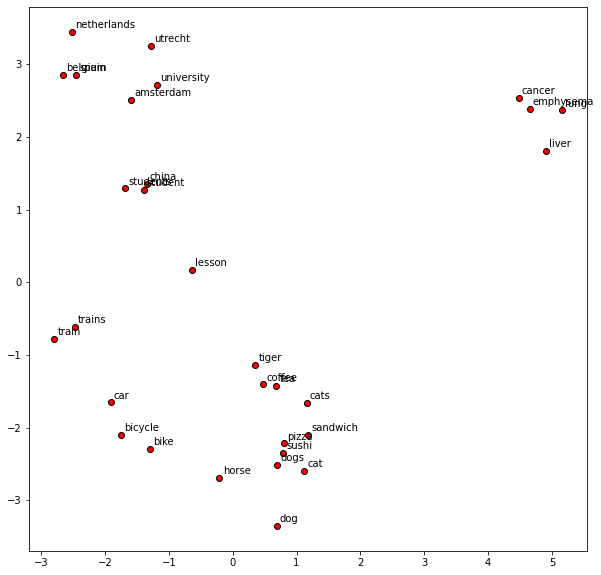

In [17]:
display_scatterplot(wv, 
                        ['dog', 'cat', 'dogs', 'cats', 'horse', 'tiger',
                         'university', 'lesson', 'student', 'students',
                         'netherlands', 'amsterdam', 'utrecht', 'belgium', 'spain', 'china',
                         'coffee', 'tea', 'pizza', 'sushi', 'sandwich',
                         'car', 'train', 'bike', 'bicycle', 'trains',
                         'lung', 'cancer', 'liver', 'emphysema'])


**Question**: What do you notice in this plot? Do the distances between the words make sense? Any surprises? Feel free to add your own words!